In [25]:
import requests
import numpy as np
import tweepy
import pandas as pd
import random
import numpy 
import json
import matplotlib.pyplot as plt
import time
from pprint import pprint
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [26]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [27]:
target_user = ['@BBC', '@CBS', "@CNN", "@FoxNews", "@nytimes"]
filename = ["bbc_sentiment", "cbs_sentiment", "cnn_sentiment", "fox_sentiment", "nyt_sentiment"]

In [28]:
def Sentiment_Analysis(target):
    counter = 1
    sentiments = []
    public_tweet = api.user_timeline(target, count = 100 )
    
    for tweet in public_tweet :
        
        results = analyzer.polarity_scores(tweet["text"])
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]
        tweets_ago = counter
        
        sentiments.append({
            "twitter source account" : target,
            "Tweets ago" : tweets_ago,
            "Date" : tweet['created_at'],
            "Compound" : compound,
            'Negative' : neg,
            "Positive"  : pos,
            "Neutral"  : neu,
            "tweet_text" : tweet["text"]
            
        })
        
        counter = counter + 1
        
    data= pd.DataFrame.from_dict(sentiments)
    data.sort_index(axis=0 ,ascending=False, inplace = True)  
    return  data

In [29]:
bbc_sentiment = Sentiment_Analysis('@BBC')
cbs_sentiment = Sentiment_Analysis('@CBS')
cnn_sentiment = Sentiment_Analysis("@CNN")
fox_sentiment = Sentiment_Analysis("@FoxNews")
nyt_sentiment = Sentiment_Analysis("@nytimes")

In [30]:
cbs_sentiment.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
99,0.1531,Sun Feb 04 12:00:01 +0000 2018,0.000,0.882,0.118,100,.@KeshaRose's emotional performance with @Cynd...,@CBS
98,0.0000,Sun Feb 04 15:35:36 +0000 2018,0.000,1.000,0.000,99,RT @thegoodfight: The acclaimed series returns...,@CBS
97,0.0772,Tue Feb 06 17:05:49 +0000 2018,0.106,0.773,0.121,98,RT @thegoodfight: There's no season like lawye...,@CBS
96,0.0000,Tue Feb 06 22:21:39 +0000 2018,0.000,1.000,0.000,97,"RT @BullCBS: Tonight, one of these 3 TAC emplo...",@CBS
95,0.5574,Wed Feb 07 16:17:48 +0000 2018,0.152,0.536,0.312,96,Are you a sucker for jaw-dropping talent compe...,@CBS


In [31]:
bbc_sentiment.head()

,Compound,Date,Negative,Neutral,Positive,Tweets ago,tweet_text,twitter source account
99,0.2235,Tue Mar 20 13:16:25 +0000 2018,0.0,0.881,0.119,100,RT @BBCWalesNews: 🎟🎞🍿Cinema makes maths class ...,@BBC
98,0.0000,Tue Mar 20 14:03:04 +0000 2018,0.0,1.000,0.000,99,Prince Harry and Meghan Markle have chosen an ...,@BBC
97,0.6369,Tue Mar 20 14:24:06 +0000 2018,0.0,0.741,0.259,98,📸The best pictures from the 2018 Paralympic Wi...,@BBC
96,0.4084,Tue Mar 20 15:03:02 +0000 2018,0.0,0.868,0.132,97,'Everybody has a voice'. ❤️️🎶\n\nRugby legends...,@BBC
95,0.0000,Tue Mar 20 15:33:03 +0000 2018,0.0,1.000,0.000,96,The first polar bear cub to be born in the UK ...,@BBC


In [32]:
# cnn_sentiment.head()
# fox_sentiment.head()
# nyt_sentiment.head()

In [33]:
def plotting_scatter(x, y, color, label) :  
    return plt.scatter(x, y, c = color, alpha = 0.5,  s = 100,  label = label)

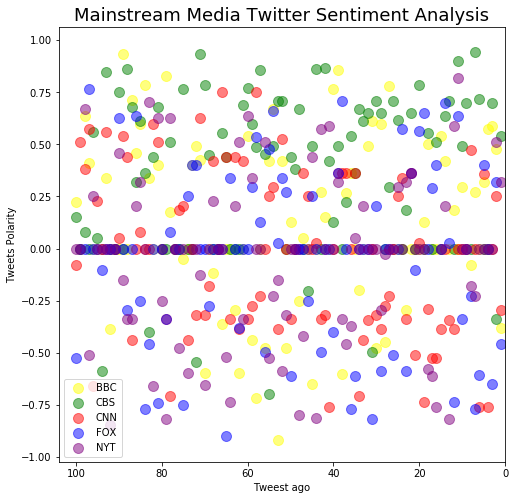

In [39]:
plt.figure(figsize =(8,8))

plotting_scatter(bbc_sentiment['Tweets ago'], bbc_sentiment['Compound'], "yellow", 'BBC')
plotting_scatter(cbs_sentiment['Tweets ago'], cbs_sentiment['Compound'], "g", 'CBS')
plotting_scatter(cnn_sentiment['Tweets ago'], cnn_sentiment['Compound'], "r", 'CNN')
plotting_scatter(fox_sentiment['Tweets ago'], fox_sentiment['Compound'], "b", 'FOX')
plotting_scatter(fox_sentiment['Tweets ago'], nyt_sentiment['Compound'], "purple", 'NYT')

plt.legend(loc = "best")
plt.title("Mainstream Media Twitter Sentiment Analysis" ,fontsize = 18)
plt.xlabel("Tweest ago")
plt.ylabel("Tweets Polarity")
plt.xlim(104,-0.04)
plt.show()


In [40]:
plt.savefig("Mainstream Media Twitter Sentiment Analysis")

In [37]:

average_sentiment =  {
    "BBC" : np.mean(bbc_sentiment['Compound']), 
    "CNN" : np.mean(cnn_sentiment['Compound']),
    "FOX": np.mean(fox_sentiment['Compound']),
    "CBS" : np.mean(cbs_sentiment['Compound']),
    "NYT": np.mean(nyt_sentiment['Compound']) }

average_sentiment


{'BBC': 0.11030099999999995,
 'CBS': 0.33169,
 'CNN': -0.01819499999999999,
 'FOX': -0.03142000000000001,
 'NYT': -0.04013500000000001}

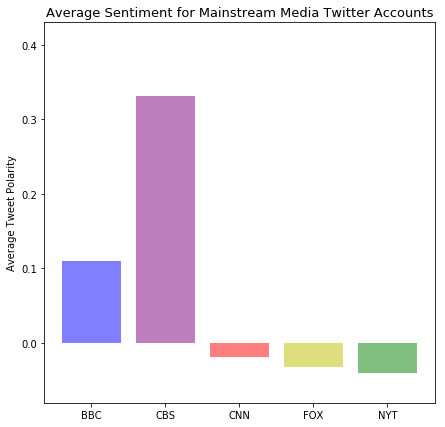

In [51]:
plt.figure(figsize = (7,7))
plt.bar(average_sentiment.keys(), average_sentiment.values(), color = ['b', 'r', 'y', 'purple', 'g'],alpha = 0.5)
plt.title('Average Sentiment for Mainstream Media Twitter Accounts', fontsize = 13)
plt.ylabel("Average Tweet Polarity")
plt.ylim(-0.08, 0.43)
plt.show()


In [45]:
plt.savefig("Mainstream Media Twitter Sentiment Analysis")